<a href="https://colab.research.google.com/github/SkeideLab/PRAWN_ER/blob/main/notebooks/dnn_stimulus_representation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Stimulus selection based on "brain-like" CNNs/DNNs for matching low-level visual features

This procedure finds stimuli, which are matching in their low-level-visual features based on CNNs which are supposed to be brain-like (i.e., visual-stream like).

AlexNet (1,2) is chosen, as it is supposed to be brain-like (3), and might have a brain-like hierarchy (4).

## Stimulus selection (1)

From the rhesus monkey face database (XXX), all monkeys are chosen that look more or less frontally into the camera (slight variations allowed). Some monkeys were excluded due to very different appearence, such as having a very different skin or hair color, having a very huge mark somewhere in the face, and so on. Onley monkey individuals with >= 2 images were chosen. (located in folder imgs)

Humans where chosen from the RAFD face database (XXX). Only white, male individuals were chosen. To have slight variability in the stimulus, but no strong emotional expressions, we chose 3 individuals for which the neutral and the contemptuous facial expression looked very similar, i.e., the contemtuous facial expression looked very neutral. The face of each image was cut by removing everything below the chinline, but keeping characteristics such as hairs and ears. The faces were copped in GIMP (XXX, function "cropped to content").


## Stimulus RSMs (1) - Aligning within-individual similarity

Face and monkey stimuli were chosen to extract the neural activations from AlexNet for each image (5 convolutional layers), and concatenated. Pearson Correlation coefficients were then calculated between each pair of stimuli (within and across stimuli of the same individuals and within and across species).

Then, for each individual (human and monkey), the sub-compartment of the correlation matrix was selected, and its lower triangular matrix (sparing diagonal values) were extracted.

These pairwise correlation values were then plotted for each individual.

## Stimulus selection (2)

Based on these pairwise correlations, we saw that human stimuli are very similar to each other within the identity, whereas monkey stimuli were typically less similar to each other within one identity. Therefore, we selected some monkeys and their best matching stimulus pair which have high similarity, to be similarly similar to each other (within identity) then the human stimuli (within identity).

These remaining monkey stimuli were manually processed in GIMP (XXX). The part of the background without image information was cropped (function "crop to content"). Then, the monkey face was rotated so that the eyes approximately lie on a horizontal line.


## Stimulus RSMs (2) - Aligning between-individual similarity

We used these top matching stimuli then again to run another RSA, for another round of selection, to align the dissimilarity between stimuli within one species.

One monkey was very dissimilar to all other monkeys. Another monkey had very high dissimilarity between the two corresponding stimuli, which was similar dissimilar than to stimuli of other monkeys. Therefore these two monkeys were excluded and the final two monkeys were found.

Regarding the humans: Each pair of the three humans seemed appropriate. However, humans 1 and 2 were chosen as they are more dissimilar as when chosing humans 2 and 3 or 2 and 3.

## Final similarities between stimuli

similarity between individuals within species:

human 1-2: 0.5034631578901552

monkey 12-15: 0.47498148841762233

similarity between stimuli within individuals:

human 1: 0.8682954789690445

human 2: 0.7678714580795263

monkey 12: 0.7695401611365418

monkey 15: 0.7844933965582478


See heatmap "...step3.png" for reference (last of this Colab notebook)!


The stimuli were NOT further matched for luminance or similar!


## References



1.   https://en.wikipedia.org/wiki/AlexNet
2.   Krizhevsky, Alex; Sutskever, Ilya; Hinton, Geoffrey E. (2017-05-24). "ImageNet classification with deep convolutional neural networks" (PDF). Communications of the ACM. 60 (6): 84–90. doi:10.1145/3065386
3.   Schrimpf, M., Kubilius, J., Hong, H., Majaj, N. J., Rajalingham, R., Issa, E. B., Kar, K., Bashivan, P., Prescott-Roy, J., Geiger, F., Schmidt, K., Yamins, D. L. K., & DiCarlo, J. J. (2018). Brain-Score: Which Artificial Neural Network for Object Recognition is most Brain-Like? [Preprint]. Neuroscience. https://doi.org/10.1101/407007
4.   Nonaka, S., Majima, K., Aoki, S. C., & Kamitani, Y. (2021). Brain hierarchy score: Which deep neural networks are hierarchically brain-like? IScience, 24(9), 103013. https://doi.org/10.1016/j.isci.2021.103013







In [ ]:
from google.colab import drive
drive.mount('/content/drive/', force_remount=True)
import os
import numpy as np
import pandas as pd
from tqdm import tqdm
from glob import glob
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
import torch
from torchvision import transforms
from pathlib import Path


# import offshore leak data sets
base_path = "./drive/MyDrive/PRAWN/"
img_path = f"{base_path}imgs/"

Mounted at /content/drive/


## Get PyTorch AlexNet model

(https://colab.research.google.com/github/pytorch/pytorch.github.io/blob/master/assets/hub/pytorch_vision_alexnet.ipynb#scrollTo=political-mount)


In [ ]:
model = torch.hub.load('pytorch/vision:v0.10.0', 'alexnet', pretrained=True) # 
model.eval()

Using cache found in /root/.cache/torch/hub/pytorch_vision_v0.10.0
/usr/local/lib/python3.9/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=AlexNet_Weights.IMAGENET1K_V1`. You can also use `weights=AlexNet_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
 

## extract intermediate layer activations 
https://kozodoi.me/python/deep%20learning/pytorch/tutorial/2021/05/27/extracting-features.html

In [ ]:
# HELPER FUNCTION FOR FEATURE EXTRACTION
def get_features(name):
    def hook(model, input, output):
        features[name] = output.detach().flatten().numpy()
    return hook

# REGISTER HOOK
model.features[0].register_forward_hook(get_features('layer0'))
model.features[3].register_forward_hook(get_features('layer3'))
model.features[6].register_forward_hook(get_features('layer6'))
model.features[8].register_forward_hook(get_features('layer8'))
model.features[10].register_forward_hook(get_features('layer10'))

# function to preprocess image
preprocess = transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
    ])

In [ ]:
# get all image names
img_path = f"{base_path}imgs/"
files = sorted(glob(img_path + "*.png"))
files

['./drive/MyDrive/PRAWN/imgs/a1_1.png',
 './drive/MyDrive/PRAWN/imgs/a1_2.png',
 './drive/MyDrive/PRAWN/imgs/a2_1.png',
 './drive/MyDrive/PRAWN/imgs/a2_2.png',
 './drive/MyDrive/PRAWN/imgs/a3_1.png',
 './drive/MyDrive/PRAWN/imgs/a3_2.png',
 './drive/MyDrive/PRAWN/imgs/r01_02.png',
 './drive/MyDrive/PRAWN/imgs/r01_04.png',
 './drive/MyDrive/PRAWN/imgs/r01_07.png',
 './drive/MyDrive/PRAWN/imgs/r01_12.png',
 './drive/MyDrive/PRAWN/imgs/r01_14.png',
 './drive/MyDrive/PRAWN/imgs/r01_16.png',
 './drive/MyDrive/PRAWN/imgs/r03_05.png',
 './drive/MyDrive/PRAWN/imgs/r12_05.png',
 './drive/MyDrive/PRAWN/imgs/r12_18.png',
 './drive/MyDrive/PRAWN/imgs/r12_19.png',
 './drive/MyDrive/PRAWN/imgs/r12_20.png',
 './drive/MyDrive/PRAWN/imgs/r12_21.png',
 './drive/MyDrive/PRAWN/imgs/r12_22.png',
 './drive/MyDrive/PRAWN/imgs/r12_23.png',
 './drive/MyDrive/PRAWN/imgs/r14_32.png',
 './drive/MyDrive/PRAWN/imgs/r14_33.png',
 './drive/MyDrive/PRAWN/imgs/r14_34.png',
 './drive/MyDrive/PRAWN/imgs/r14_38.png',
 './

In [ ]:
features_all = {}

for file in files:
    filename = Path(file).stem
    features = {}

    # load image and convert to RGB (remove alpha)
    input_image = Image.open(file).convert('RGB')

    # preprocess image
    input_tensor = preprocess(input_image)

    # create a mini-batch as expected by the model
    input_batch = input_tensor.unsqueeze(0)

    # move the input and model to GPU for speed if available
    output = model(input_batch)
    
    features_all[filename] = features
    # Tensor of shape 1000, with confidence scores over Imagenet's 1000 classes
    #print(output[0])
    # The output has unnormalized scores. To get probabilities, you can run a softmax on it.
    #probabilities = torch.nn.functional.softmax(output[0], dim=0)
    #print(probabilities)

In [ ]:
for i in features_all[filename].keys():
    print(f"{i} has {features_all[filename][i].shape[0]} activations.")

layer0 has 193600 activations.
layer3 has 139968 activations.
layer6 has 64896 activations.
layer8 has 43264 activations.
layer10 has 43264 activations.


In [ ]:
# concatenate all layers, as these convolutional layers are supposed to mainly represent V1+V2+V3
features_concat = np.zeros((features_all[filename]['layer0'].shape[0] + 
                            features_all[filename]['layer3'].shape[0] + 
                            features_all[filename]['layer6'].shape[0] + 
                            features_all[filename]['layer8'].shape[0] + 
                            features_all[filename]['layer10'].shape[0],
                            len(files) ))

counter = 0
for im in features_all.keys():
    all_activations = []
    for layer in features_all[im].keys():
        all_activations.append(features_all[im][layer])
    all_activations = [i for j in all_activations for i in j]
    #[val for sublist in matrix for val in sublist]
    features_concat[:,counter] = all_activations 
    counter += 1



In [ ]:
features_concat.shape

(484992, 29)

In [ ]:
# save embeddings to file
np.save(f"{base_path}embeddings_layers_selection_narrow_step1", features_concat)

## visualize stimulus RSM

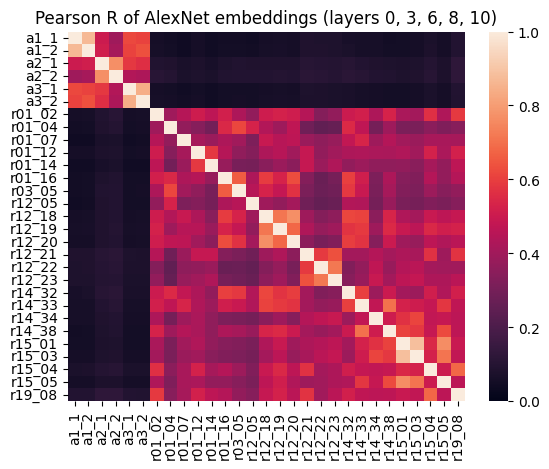

In [ ]:
emb_corr = np.corrcoef(features_concat, rowvar=False)

#labels = ["h1_i1","h1_i2",
#          "h2_i1","h2_i2",
#          "m1_i1","m1_i2",
#          "m2_i1","m2_i2"]
labels = [str(i) for i in features_all.keys()]

sns.heatmap(emb_corr, vmin=0, vmax=1,
            xticklabels=labels,
            yticklabels=labels)
plt.title("Pearson R of AlexNet embeddings (layers 0, 3, 6, 8, 10)")
plt.savefig(base_path + "RDM_selection_narrow.png", dpi=300)
plt.show()

now search in this matrix:
1. from each identity (rXX or gXX), find lower triagonal values
2. extract them into pd df
3. make scatterplot per individuum and label each datapoint to find suiting data points

In [ ]:
names = list(features_all.keys())

In [ ]:
identities = set([i.split("_")[0] for i in names])
identities

{'a1', 'a2', 'a3', 'r01', 'r03', 'r12', 'r14', 'r15', 'r19'}

In [ ]:
# attention: the same identities need to be next to each other, but this is achieved through similar file name
df = pd.DataFrame({"identity": [],
                   "name": [],
                   "similarity": []})

for id in identities:
    # get index in array for identities
    indices = [i for i,j in enumerate(names) if id in j]
    labels_indices = [j for i,j in enumerate(names) if id in j]
    print(f"identity: {id}, indices {indices}")
    n_imgs = len(indices)

    # get the square of the identity
    square = emb_corr[indices[0]:indices[-1]+1, indices[0]:indices[-1]+1]
    lowtri_indices = np.tril_indices(n_imgs, -1) # spare diagonal

    values_lowtri = square[lowtri_indices]

    labels_lowtri = []
    
    for i, li in enumerate(labels_indices):
        for j, lj in enumerate(labels_indices):
            if i > j:
              labels_lowtri.append(f"{li}_{lj}")


    df_tmp = pd.DataFrame({"identity": np.repeat(id, len(labels_lowtri)),
                           "name": labels_lowtri,
                           "similarity": values_lowtri})
    df = df.append(df_tmp) 


identity: a3, indices [4, 5]
identity: r12, indices [13, 14, 15, 16, 17, 18, 19]
identity: a1, indices [0, 1]
identity: r14, indices [20, 21, 22, 23]
identity: r19, indices [28]
identity: a2, indices [2, 3]
identity: r01, indices [6, 7, 8, 9, 10, 11]
identity: r15, indices [24, 25, 26, 27]
identity: r03, indices [12]


<ipython-input-90-723516cde91e>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_tmp)
<ipython-input-90-723516cde91e>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_tmp)
<ipython-input-90-723516cde91e>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_tmp)
<ipython-input-90-723516cde91e>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_tmp)
<ipython-input-90-723516cde91e>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_tmp)
<ipython-input-90-723516cde91e

In [ ]:
df = df.sort_values("identity")
df.to_csv(base_path + "df1.csv", index=False)
df

,identity,name,similarity
0,a1,a1_2_a1_1,0.868295
0,a2,a2_2_a2_1,0.767871
0,a3,a3_2_a3_1,0.843612
9,r01,r01_14_r01_12,0.585676
4,r01,r01_12_r01_04,0.339573
3,r01,r01_12_r01_02,0.504616
2,r01,r01_07_r01_04,0.368773
0,r01,r01_04_r01_02,0.398131
6,r01,r01_14_r01_02,0.468435
13,r01,r01_16_r01_12,0.445635


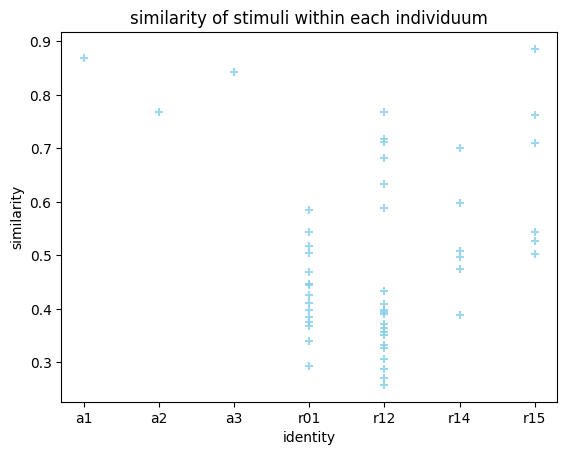

In [ ]:
sns.regplot(data=df, x="identity", y="similarity", fit_reg=False, marker="+", color="skyblue")
plt.title("similarity of stimuli within each individuum")
plt.savefig(base_path + "similarities_per_individual.png", dpi=300)
plt.show()

In [ ]:
# get maximum similarity value of each identity
df_summary = df.groupby("identity").agg('max')
df_summary.to_csv(base_path + "df1_top.csv", index=False)
df_summary

,name,similarity
identity,,
a1,a1_2_a1_1,0.868295
a2,a2_2_a2_1,0.767871
a3,a3_2_a3_1,0.843612
r01,r01_16_r01_14,0.585676
r12,r12_23_r12_22,0.767617
r14,r14_38_r14_34,0.700706
r15,r15_05_r15_04,0.886119


(array([1, 2, 2, 3, 3, 3]), array([0, 0, 1, 0, 1, 2]))

# RSA 2:  I take the individuals with the highest similarity, but which visually still look similar (e.g., age, color)

In [ ]:
# get all image names
img_path = f"{base_path}imgs2/"
files = sorted(glob(img_path + "*.png"))
files

['./drive/MyDrive/PRAWN/imgs2/a1_1.png',
 './drive/MyDrive/PRAWN/imgs2/a1_2.png',
 './drive/MyDrive/PRAWN/imgs2/a2_1.png',
 './drive/MyDrive/PRAWN/imgs2/a2_2.png',
 './drive/MyDrive/PRAWN/imgs2/a3_1.png',
 './drive/MyDrive/PRAWN/imgs2/a3_2.png',
 './drive/MyDrive/PRAWN/imgs2/r01_14rot.png',
 './drive/MyDrive/PRAWN/imgs2/r01_16rot.png',
 './drive/MyDrive/PRAWN/imgs2/r12_22rot.png',
 './drive/MyDrive/PRAWN/imgs2/r12_23rot.png',
 './drive/MyDrive/PRAWN/imgs2/r14_34rot.png',
 './drive/MyDrive/PRAWN/imgs2/r14_38rot.png',
 './drive/MyDrive/PRAWN/imgs2/r15_04rot.png',
 './drive/MyDrive/PRAWN/imgs2/r15_05rot.png']

In [ ]:
features_all = {}

for file in files:
    filename = Path(file).stem
    features = {}

    # load image and convert to RGB (remove alpha)
    input_image = Image.open(file).convert('RGB')

    # preprocess image
    input_tensor = preprocess(input_image)

    # create a mini-batch as expected by the model
    input_batch = input_tensor.unsqueeze(0)

    # move the input and model to GPU for speed if available
    output = model(input_batch)
    
    features_all[filename] = features

In [ ]:
# concatenate all layers, as these convolutional layers are supposed to mainly represent V1+V2+V3
features_concat = np.zeros((features_all[filename]['layer0'].shape[0] + 
                            features_all[filename]['layer3'].shape[0] + 
                            features_all[filename]['layer6'].shape[0] + 
                            features_all[filename]['layer8'].shape[0] + 
                            features_all[filename]['layer10'].shape[0],
                            len(files) ))

counter = 0
for im in features_all.keys():
    all_activations = []
    for layer in features_all[im].keys():
        all_activations.append(features_all[im][layer])
    all_activations = [i for j in all_activations for i in j]
    #[val for sublist in matrix for val in sublist]
    features_concat[:,counter] = all_activations 
    counter += 1


In [ ]:
# save embeddings to file
np.save(f"{base_path}embeddings_layers_selection_narrow_step2", features_concat)

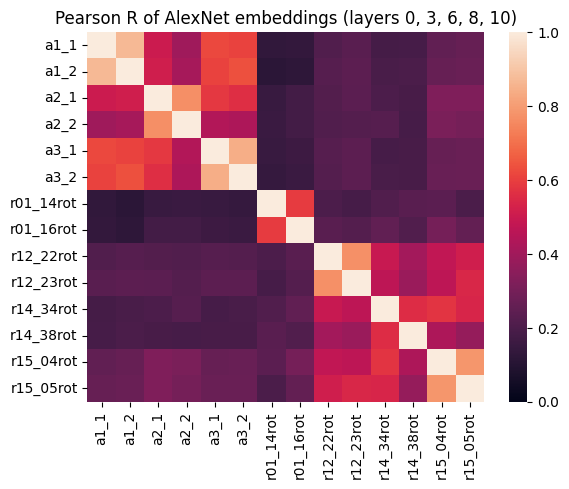

In [ ]:
# visualize RSM

emb_corr = np.corrcoef(features_concat, rowvar=False)

labels = [str(i) for i in features_all.keys()]

sns.heatmap(emb_corr, vmin=0, vmax=1,
            xticklabels=labels,
            yticklabels=labels)
plt.title("Pearson R of AlexNet embeddings (layers 0, 3, 6, 8, 10)")
plt.savefig(base_path + "RDM_selection_narrow_step2.png", dpi=300)
plt.show()

Regarding the Monkeys:
- r01 seems to be very dissimilar to all other monkeys (and humans), and therefore too dissimilar (more dissimilar than humans are to each other)
- r14 seems to have low intra-individual similarity compared to inter-individual, therefore remove it.

Only R12 and R15 seem similar than within humans.

Regarding the Humans:
- all humans seem kinda appropriate.
- i would chose 1&2, as they are more dissimilar than 1&3. Then dissimilarity should be similar between humans than between monkeys. However, I will double check in the following the dissimilarities:

In [ ]:
# repeat it just with just the final monkeys, so that we have a better overview of the values for the humans in particular

# get all image names
img_path = f"{base_path}imgs3/"
files = sorted(glob(img_path + "*.png"))
files

['./drive/MyDrive/PRAWN/imgs3/a1_1.png',
 './drive/MyDrive/PRAWN/imgs3/a1_2.png',
 './drive/MyDrive/PRAWN/imgs3/a2_1.png',
 './drive/MyDrive/PRAWN/imgs3/a2_2.png',
 './drive/MyDrive/PRAWN/imgs3/a3_1.png',
 './drive/MyDrive/PRAWN/imgs3/a3_2.png',
 './drive/MyDrive/PRAWN/imgs3/r12_22rot.png',
 './drive/MyDrive/PRAWN/imgs3/r12_23rot.png',
 './drive/MyDrive/PRAWN/imgs3/r15_04rot.png',
 './drive/MyDrive/PRAWN/imgs3/r15_05rot.png']

In [ ]:
features_all = {}

for file in files:
    filename = Path(file).stem
    features = {}

    # load image and convert to RGB (remove alpha)
    input_image = Image.open(file).convert('RGB')

    # preprocess image
    input_tensor = preprocess(input_image)

    # create a mini-batch as expected by the model
    input_batch = input_tensor.unsqueeze(0)

    # move the input and model to GPU for speed if available
    output = model(input_batch)
    
    features_all[filename] = features

In [ ]:
# concatenate all layers, as these convolutional layers are supposed to mainly represent V1+V2+V3
features_concat = np.zeros((features_all[filename]['layer0'].shape[0] + 
                            features_all[filename]['layer3'].shape[0] + 
                            features_all[filename]['layer6'].shape[0] + 
                            features_all[filename]['layer8'].shape[0] + 
                            features_all[filename]['layer10'].shape[0],
                            len(files) ))

counter = 0
for im in features_all.keys():
    all_activations = []
    for layer in features_all[im].keys():
        all_activations.append(features_all[im][layer])
    all_activations = [i for j in all_activations for i in j]
    #[val for sublist in matrix for val in sublist]
    features_concat[:,counter] = all_activations 
    counter += 1

In [ ]:
# save embeddings to file
np.save(f"{base_path}embeddings_layers_selection_narrow_step3", features_concat)

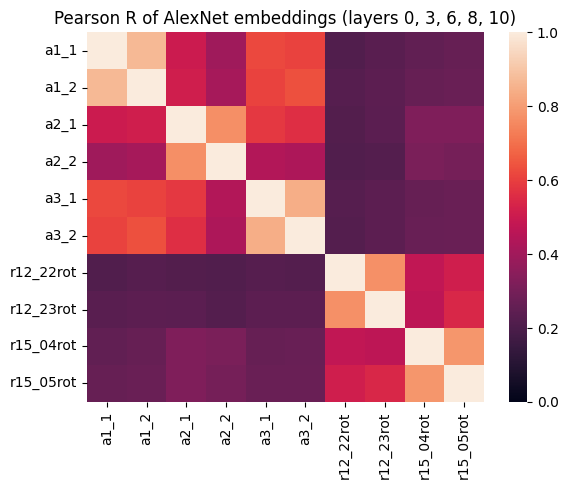

In [ ]:
# visualize RSM

emb_corr = np.corrcoef(features_concat, rowvar=False)

labels = [str(i) for i in features_all.keys()]

sns.heatmap(emb_corr, vmin=0, vmax=1,
            xticklabels=labels,
            yticklabels=labels)
plt.title("Pearson R of AlexNet embeddings (layers 0, 3, 6, 8, 10)")
plt.savefig(base_path + "RDM_selection_narrow_step3.png", dpi=300)
plt.show()

In [ ]:
emb_corr

array([[1.        , 0.86829548, 0.50346316, 0.39757542, 0.62080678,
        0.60929689, 0.21444991, 0.23156567, 0.25294288, 0.26407974],
       [0.86829548, 1.        , 0.51393278, 0.41029421, 0.60882028,
        0.63624921, 0.22450728, 0.24154264, 0.26187049, 0.26995346],
       [0.50346316, 0.51393278, 1.        , 0.76787146, 0.58554259,
        0.56173708, 0.21801836, 0.23716109, 0.32155321, 0.32042076],
       [0.39757542, 0.41029421, 0.76787146, 1.        , 0.44034922,
        0.4286819 , 0.21299916, 0.22068719, 0.31227679, 0.29885494],
       [0.62080678, 0.60882028, 0.58554259, 0.44034922, 1.        ,
        0.84361245, 0.22384986, 0.24009026, 0.26559559, 0.27053719],
       [0.60929689, 0.63624921, 0.56173708, 0.4286819 , 0.84361245,
        1.        , 0.22229694, 0.23969161, 0.2663771 , 0.2726841 ],
       [0.21444991, 0.22450728, 0.21801836, 0.21299916, 0.22384986,
        0.22229694, 1.        , 0.76954016, 0.47498149, 0.512768  ],
       [0.23156567, 0.24154264, 0.2371610

In [ ]:
# extract relevant tiles

sim_human_1_2 = np.median(emb_corr[2:3,0:1])
sim_human_1_3 = np.median(emb_corr[4:5,0:1])
sim_human_2_3 = np.median(emb_corr[4:5,2:3])
sim_monkey_12_15 = np.median(emb_corr[6:7,8:9])

print(f"""similarity between individuals within species:
human 1-2: {sim_human_1_2}
human 1-3: {sim_human_1_3}
human 2-3: {sim_human_2_3}
monkey 12-15: {sim_monkey_12_15}
""")


sim_human_1 = emb_corr[0,1]
sim_human_2 = emb_corr[2,3]
sim_human_3 = emb_corr[4,5]
sim_monkey_12 = emb_corr[6,7]
sim_monkey_15 = emb_corr[8,9]

print(f"""similarity between stimuli within individuals:
human 1: {sim_human_1}
human 2: {sim_human_2}
human 3: {sim_human_3}
monkey 12: {sim_monkey_12}
monkey 15: {sim_monkey_15}
""")

similarity between individuals within species:
human 1-2: 0.5034631578901552
human 1-3: 0.6208067754586918
human 2-3: 0.5855425860275147
monkey 12-15: 0.47498148841762233

similarity between stimuli within individuals:
human 1: 0.8682954789690445
human 2: 0.7678714580795263
human 3: 0.8436124496178822
monkey 12: 0.7695401611365418
monkey 15: 0.7844933965582478




humans 1-2 and monkey 12-15 are relatively similarly similar !!!


Stick with those!




In [ ]:
#human 1-2 and monkey 12-15 are relatively similarly similar !!!


#stick with those!



In [ ]:
# Download ImageNet labels
#!wget https://raw.githubusercontent.com/pytorch/hub/master/imagenet_classes.txt

In [ ]:
## Read the categories
#with open("imagenet_classes.txt", "r") as f:
#    categories = [s.strip() for s in f.readlines()]
## Show top categories per image
#top5_prob, top5_catid = torch.topk(probabilities, 5)
#for i in range(top5_prob.size(0)):
#    print(categories[top5_catid[i]], top5_prob[i].item())